Creating wordcloud (webscrapping)

source: https://github.com/m3redithw/data-science-visualizations/blob/main/WordClouds/wordclouds.ipynb

In [12]:
import requests
from bs4 import BeautifulSoup
from cleantext import clean
import re
from string import punctuation
from PIL import Image
import numpy as np

In [2]:
# get URL
ds = requests.get("https://en.wikipedia.org/wiki/Data_science")
 
# display status code
print(ds.status_code)
 
# display scrapped data
print(ds.content)

# store content into variable
ds_text = BeautifulSoup(ds.content, 'html.parser').text

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Data science - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9266424b-1d63-448f-a1e5-71ffc8702beb","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1120574273,"wgRevisionId":1120574273,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupatio

In [3]:
# check datatype
type(ds_text)

str

In [4]:
# use function to clean text
ds_text = ds_text.lower() #Lower case 
ds_text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", ds_text)
ds_text = " ".join(ds_text.split())  #Remove extra spaces, tabs, and new lines
ds_text = re.sub(f"[{re.escape(punctuation)}]", "", ds_text) #Remove punctuations
ds_text = re.sub(r"\b[0-9]+\b\s*", "", ds_text) #Remove numbers
ds_text = " ".join([w for w in ds_text.split() if not w.isdigit()]) #Side effect: removes extra spaces
ds_text = " ".join([w for w in ds_text.split() if w.isalpha()]) #Side effect: removes extra spaces

In [5]:
tokens = ds_text.split()
clean_tokens = [t for t in tokens if len(t) > 1]
clean_text = " ".join(clean_tokens)

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_ = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mepra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tokens = clean_text.split()
clean_tkns = [t for t in tokens if not t in stopwords_]
clean_text2 = " ".join(clean_tkns)

In [13]:
mask = np.array(Image.open(r'C:\Users\mepra\OneDrive\Pictures\Camera Roll\R.png'))

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

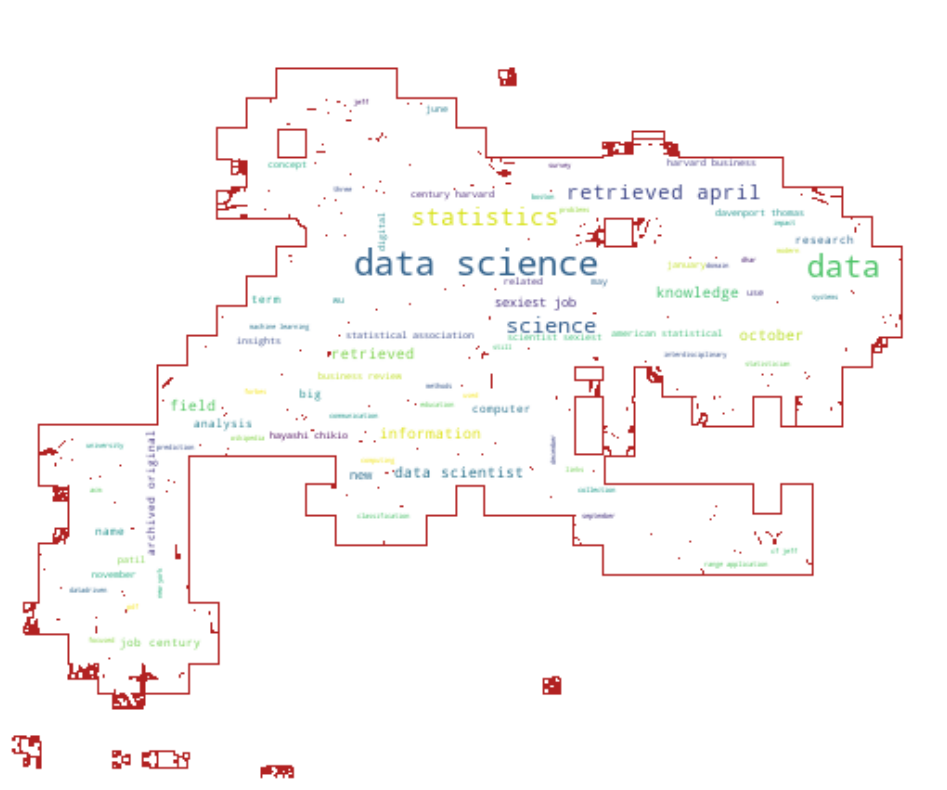

In [20]:
# Plot the wordcloud with the mask applied
wc = WordCloud(background_color='#FFFFFF', contour_width=1, contour_color='firebrick', 
               mask= mask, random_state = 120, max_words= 900).generate(clean_text2)
plt.figure(figsize=[12,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear") 
plt.axis("off")
plt.show()